In [10]:
import pandas as pd
import numpy as np
import pickle
import configparser
from sqlalchemy import create_engine
from sqlalchemy.types import String, Integer
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.style.use('ggplot')
%matplotlib inline

config = configparser.ConfigParser()
config.read('config.ini')
username = config['mariadb']['username']
password = config['mariadb']['password']
database = config['mariadb']['database']
url = 'mysql+pymysql://' + username + ':' + password + '@localhost:3306/' + database + '?charset=utf8'
engine = create_engine(url)

In [11]:
sql = '''
SELECT *
FROM grantaward
LEFT OUTER JOIN kaken_master_category USING (category_niicode)
LEFT OUTER JOIN kaken_master_section USING (section_niicode)
LEFT OUTER JOIN kaken_master_institution USING (institution_niicode)
WHERE grantaward.startfiscalyear >= 2017
AND grantaward.category_niicode = 249
'''
df = pd.read_sql_query(sql, engine)

In [12]:
pivot = pd.crosstab(df['category_name'], df['startfiscalyear'])
pivot

startfiscalyear,2017,2018
category_name,,
挑戦的研究(開拓),94,88


Text(0,0.5,'採択件数')

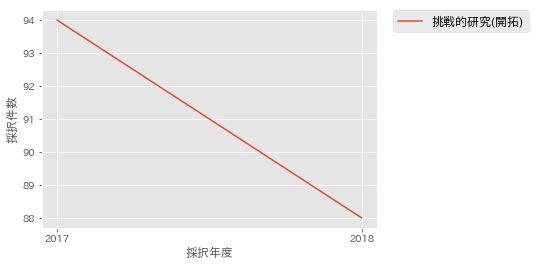

In [13]:
pivot = pivot.T
pivot.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)

# X軸の数字が必ず整数になるようにする
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))

plt.xlabel("採択年度")
plt.ylabel("採択件数")

In [14]:
pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 2017 to 2018
Data columns (total 1 columns):
挑戦的研究(開拓)    2 non-null int64
dtypes: int64(1)
memory usage: 112.0 bytes


In [15]:
teidaicode = [10101, 11301, 12601, 13901, 14301, 14401, 17102, 15301, 13101, 23903, 22701, 24402]
teidai = df[df['institution_niicode'].isin(teidaicode)]
pivot = pd.crosstab(teidai['institution_name'], teidai['startfiscalyear'])
pivot = pivot.sort_values(2018, ascending=False)
pivot

startfiscalyear,2017,2018
institution_name,,
東京大学,15,10
京都大学,7,8
大阪大学,3,7
東北大学,6,6
名古屋大学,3,5
北海道大学,4,4
九州大学,7,0
新潟大学,1,0


(0, 15.75)

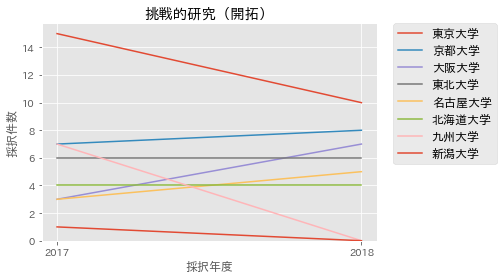

In [16]:
pivot = pd.crosstab(teidai['institution_name'], teidai['startfiscalyear'])
pivot = pivot.sort_values(2018, ascending=False)
pivot = pivot.T
ax = pivot.plot()
ax.set_title('挑戦的研究（開拓）')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)

# X軸の数字が必ず整数になるようにする
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))

ax.set_xlabel("採択年度")
ax.set_ylabel("採択件数")
ax.set_ylim(0)

In [17]:
pivot

institution_name,東京大学,京都大学,大阪大学,東北大学,名古屋大学,北海道大学,九州大学,新潟大学
startfiscalyear,,,,,,,,
2017,15,7,3,6,3,4,7,1
2018,10,8,7,6,5,4,0,0


(0, 15.75)

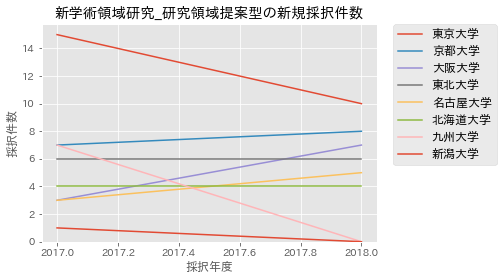

In [18]:
#pivot = pd.crosstab(teidai['institution_name'], teidai['startfiscalyear'])
#pivot = pivot.sort_values(2018, ascending=False)
#pivot = pivot.T
ax = pivot.plot()
ax.set_title('新学術領域研究_研究領域提案型の新規採択件数')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)
ax.set_xlabel("採択年度")
ax.set_ylabel("採択件数")
ax.set_ylim(0)